## Import Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib
import re
from dateutil import parser

## Import Datasets

In [2]:
df = pd.read_csv('UberEatsReviews.csv')
df.head()

,review,date,stars,name,source,state,title
0,Edit: they brought the feature back! Used to b...,"January 18, 2024",Rated 5 stars out of five stars,Rufus Wright,Google Play Store,NaN,NaN
1,Lately it's very common to wait over 2 hours f...,"January 20, 2024",Rated 1 stars out of five stars,Bastian H,Google Play Store,NaN,NaN
2,Love it. Great offers. Good selections. Food a...,"January 20, 2024",Rated 5 stars out of five stars,Andrew Higgs,Google Play Store,NaN,NaN
3,Very disappointed in this app. I've used it fo...,"January 19, 2024",Rated 1 stars out of five stars,Kristi B,Google Play Store,NaN,NaN
4,Fairly easy to use but trying to find out what...,"January 20, 2024",Rated 2 stars out of five stars,broomee c,Google Play Store,NaN,NaN


## EDA and Data Cleaning

In [3]:
df.shape    

(11770, 7)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11770 entries, 0 to 11769
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   review  11770 non-null  object
 1   date    11770 non-null  object
 2   stars   11770 non-null  object
 3   name    11755 non-null  object
 4   source  11770 non-null  object
 5   state   228 non-null    object
 6   title   335 non-null    object
dtypes: object(7)
memory usage: 643.8+ KB


In [5]:
df = df.drop(['state', 'title', 'name'], axis=1)

In [6]:
df.nunique()

review    11621
date       1430
stars        15
source        5
dtype: int64

### Cleaning Stars

In [7]:
df['stars'].unique()

array(['Rated 5 stars out of five stars',
       'Rated 1 stars out of five stars',
       'Rated 2 stars out of five stars',
       'Rated 4 stars out of five stars',
       'Rated 3 stars out of five stars', '1', '5', '4', '3', '2',
       'Rated 3 out of 5 stars', 'Rated 5 out of 5 stars',
       'Rated 2 out of 5 stars', 'Rated 1 out of 5 stars',
       'Rated 4 out of 5 stars'], dtype=object)

In [8]:
def clean_rating(rating):
    match = re.search(r'\d+', rating)
    if match:
        return match.group()
    return rating   

In [9]:
df['stars'] = df['stars'].apply(clean_rating)

In [10]:
df.head()

,review,date,stars,source
0,Edit: they brought the feature back! Used to b...,"January 18, 2024",5,Google Play Store
1,Lately it's very common to wait over 2 hours f...,"January 20, 2024",1,Google Play Store
2,Love it. Great offers. Good selections. Food a...,"January 20, 2024",5,Google Play Store
3,Very disappointed in this app. I've used it fo...,"January 19, 2024",1,Google Play Store
4,Fairly easy to use but trying to find out what...,"January 20, 2024",2,Google Play Store


### Cleaning Dates Values

In [11]:
df['date'].unique()

array(['January 18, 2024', 'January 20, 2024', 'January 19, 2024', ...,
       'Date of experience: July 28, 2023',
       'Date of experience: July 26, 2023',
       'Date of experience: July 27, 2023'], dtype=object)

In [12]:
def parse_and_format_date(date_str):
    try:
        # Remove any prefixes like "Date of experience:"
        date_str = date_str.replace("Date of experience: ", "")
        # Parse the date using dateutil.parser
        parsed_date = parser.parse(date_str)
        # Format the date as YYYY-MM-DD
        formatted_date = parsed_date.strftime('%Y-%m-%d')
        return formatted_date
    except Exception as e:
        print(f"Error parsing date: {date_str}, Error: {e}")
        return None


In [13]:
# Assuming your DataFrame is named 'df'
df['date_formatted'] = df['date'].apply(parse_and_format_date)

In [14]:
df['date_formatted'].unique()

array(['2024-01-18', '2024-01-20', '2024-01-19', '2024-01-17',
       '2024-01-12', '2024-01-09', '2024-01-14', '2024-01-15',
       '2024-01-11', '2024-01-13', '2023-12-26', '2024-01-02',
       '2024-01-21', '2023-12-28', '2023-12-09', '2023-11-17',
       '2023-12-12', '2023-11-30', '2023-12-18', '2023-12-07',
       '2023-11-29', '2023-11-20', '2023-12-10', '2023-11-07',
       '2023-11-09', '2023-12-13', '2023-11-18', '2023-11-26',
       '2023-11-28', '2024-01-08', '2023-11-19', '2023-12-16',
       '2023-12-08', '2024-01-01', '2023-12-27', '2023-11-21',
       '2024-01-06', '2023-11-22', '2024-01-03', '2023-11-16',
       '2024-01-16', '2023-12-11', '2024-01-07', '2023-11-27',
       '2023-12-23', '2023-12-14', '2023-11-24', '2023-12-03',
       '2023-12-31', '2023-12-22', '2023-12-24', '2023-12-02',
       '2024-01-05', '2023-12-21', '2023-11-14', '2023-11-04',
       '2023-11-11', '2024-01-04', '2023-11-23', '2023-12-01',
       '2023-11-05', '2023-12-30', '2023-12-17', '2023-

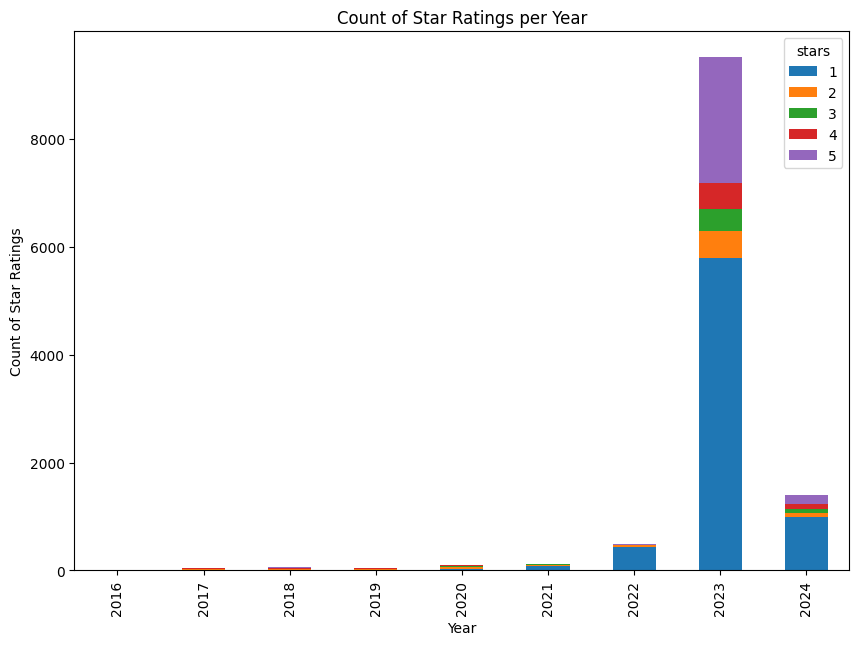

In [15]:
import matplotlib.pyplot as plt

# Ensure 'stars' is integer type
df['stars'] = df['stars'].astype(int)

# Extract year from 'date_formatted' if it's not already a column
df['year'] = pd.DatetimeIndex(df['date_formatted']).year

# Get count of each star rating for each year
star_counts = df.groupby(['year', 'stars']).size().unstack()

# Plot stacked bar chart
star_counts.plot(kind='bar', stacked=True, figsize=(10,7))

plt.title('Count of Star Ratings per Year')
plt.xlabel('Year')
plt.ylabel('Count of Star Ratings')
plt.show()

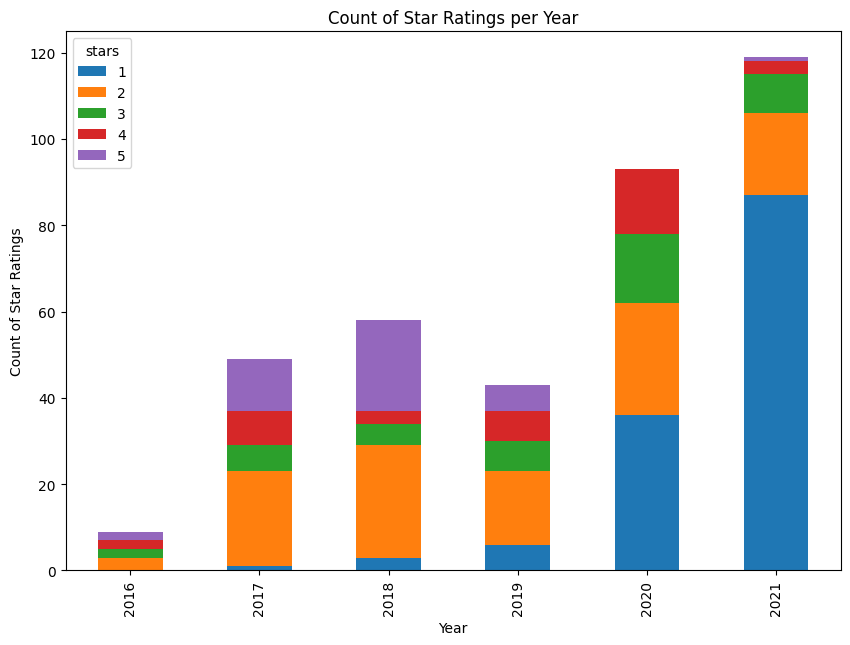

In [20]:
# Filter out 2023 and 2024
temp_df = df[~df['year'].isin([2022,2023, 2024])]

# Get count of each star rating for each year
star_counts = temp_df.groupby(['year', 'stars']).size().unstack()

# Plot stacked bar chart
star_counts.plot(kind='bar', stacked=True, figsize=(10,7))
plt.title('Count of Star Ratings per Year')
plt.xlabel('Year')
plt.ylabel('Count of Star Ratings')
plt.show()